In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\viral.thakar\Downloads\Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Capturing the importance of missing value with 1 for missing 0 for not missing

In [6]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

#### Handling Missing value of Embarked with Mode as there are very few(2) missing values.

In [7]:
freq_Embarked = df['Embarked'].mode()
df['Embarked'].fillna(freq_Embarked[0], inplace = True)

In [8]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

#### Handling missing value of Age with Median

In [9]:
def impute_median(df_a,variable,median):
    df_a[variable+'_median'] = df_a[variable].fillna(median)

In [10]:
impute_median(df,'Age',df['Age'].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


##### Checking whether Distribution matches with previous distribution of age values(including missing)

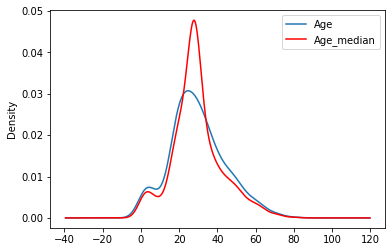

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde',ax = ax)
df.Age_median.plot(kind='kde', ax=ax, color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='best')

#### Handling missing value of Age with Random Imputation

In [12]:
random_sample = df['Age'].dropna()
random_sample = random_sample.sample(df['Age'].isnull().sum(),random_state=0)
random_sample.index=df[df['Age'].isnull()].index
df['Age_random'] = df['Age']
df.loc[df['Age_random'].isnull(),'Age_random'] = random_sample
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0


##### Checking whether Distribution matches with previous distribution of age values(including missing)

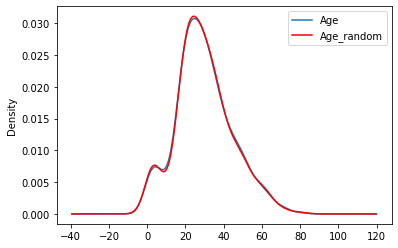

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde',ax = ax)
df.Age_random.plot(kind='kde', ax=ax, color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='best')

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_null       0
Age_median       0
Age_random       0
dtype: int64

##### Handling Missing value of Cabin by adding new new category 'Missing'

In [15]:
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin']=df['Cabin'].astype(str).str[0]
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:
def find_category_mappings(data, variable):
    return {k: i for i, k in enumerate(data[variable].sort_values().unique())}

In [17]:
cabin_label_encoding = find_category_mappings(df,'Cabin')

In [18]:
#mean_encoding = df.groupby(['Cabin'])['Survived'].mean().to_dict()
df['Cabin_Encoding']=df['Cabin'].map(cabin_label_encoding)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_median,Age_random,Cabin_Encoding
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,1,22.0,22.0,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,38.0,38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,26.0,26.0,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,35.0,35.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,35.0,35.0,7


In [19]:
# Creating Dummies
df = pd.concat([df, pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Sex'],drop_first=True)], axis=1)

In [20]:
# Dropping unwanted Columns
df.drop(['Age','Embarked','Cabin','Name','Sex','PassengerId','Ticket','Cabin_null','Age_median'],inplace=True,axis=1)

In [22]:
df.drop(['Age_median'],inplace=True,axis=1)

In [21]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_median,Age_random,Cabin_Encoding,Embarked_Q,Embarked_S,male
0,0,3,1,0,7.2500,22.0,22.0,7,0,1,1
1,1,1,1,0,71.2833,38.0,38.0,2,0,0,0
2,1,3,0,0,7.9250,26.0,26.0,7,0,1,0
3,1,1,1,0,53.1000,35.0,35.0,2,0,1,0
4,0,3,0,0,8.0500,35.0,35.0,7,0,1,1


### Training Data

In [24]:
X_train = np.asarray(df[['Pclass', 'SibSp', 'Parch', 'Fare','Age_random','Cabin_Encoding','Embarked_Q','Embarked_S','male']])
X_train.shape

(891, 9)

In [25]:
Y_train = np.asarray(df['Survived'])
Y_train [0:5]

array([0, 1, 1, 1, 0], dtype=int64)

#### Plot to see the distribution of Column values

In [471]:
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

### Testing Data

In [26]:
df_test = pd.read_csv(r'C:\Users\viral.thakar\Downloads\test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
df_test['Cabin'] = df_test['Cabin'].fillna('Missing')
df_test['Cabin']=df_test['Cabin'].astype(str).str[0]
cabin_label_encoding = find_category_mappings(df_test,'Cabin')
df_test['Cabin_Encoding']=df_test['Cabin'].map(cabin_label_encoding)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Encoding
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,M,Q,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,M,S,7
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,M,Q,7
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,M,S,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,M,S,7


In [29]:
mean_fare = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

In [30]:
random_sample = df_test['Age'].dropna()
random_sample = random_sample.sample(df_test['Age'].isnull().sum(),random_state=0)
random_sample.index=df_test[df_test['Age'].isnull()].index
df_test['Age_random'] = df_test['Age']
df_test.loc[df_test['Age_random'].isnull(),'Age_random'] = random_sample

In [31]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'],prefix='Embarked',drop_first=True)], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Sex'],drop_first=True)], axis=1)

In [32]:
df_test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],inplace =True, axis=1)

In [34]:
df_test.drop(['Age'],inplace=True,axis=1)

In [35]:
print(df.columns)
print(df_test.columns)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_random',
       'Cabin_Encoding', 'Embarked_Q', 'Embarked_S', 'male'],
      dtype='object')
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Cabin_Encoding', 'Age_random',
       'Embarked_Q', 'Embarked_S', 'male'],
      dtype='object')


In [36]:
#### Re-indexing Columns 
column_names = ['Pclass', 'SibSp', 'Parch', 'Fare','Age_random','Cabin_Encoding','Embarked_Q','Embarked_S','male']
df = df.reindex(columns=column_names)
df_test = df_test.reindex(columns=column_names)

#### Spliting Dependent and Independent Values

In [37]:
X_test = np.asarray(df_test[['Pclass', 'SibSp', 'Parch', 'Fare','Age_random','Cabin_Encoding','Embarked_Q','Embarked_S','male']])
df_test_results = pd.read_csv(r'C:\Users\viral.thakar\Downloads\gender_submission.csv')
Y_test = np.asarray(df_test_results['Survived'])

#### Standardization and Normalization

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = StandardScaler()
#X = preprocessing.StandardScaler().fit(X).transform(X)
train_scaling = scaler.fit_transform(X_train)
test_scaling = scaler.fit_transform(X_test)

## Machine Learning Algorithm

###  1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(train_scaling,Y_train)

C:\Users\viral.thakar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
yhat_LR_scaling = LR.predict(test_scaling)
yhat_LR_scaling

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
print("Accuracy Score : {}".format(accuracy_score(Y_test,yhat_LR_scaling)))
print ("Classification Report : \n{}".format(classification_report(Y_test, yhat_LR_scaling)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(Y_test,yhat_LR_scaling)))
print("Logistic Score: {}".format(round(LR.score(train_scaling,Y_train)*100,2)))

Accuracy Score : 0.9449760765550239
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418

Confusion Matrix: 
[[254  12]
 [ 11 141]]

Logistic Score: 79.69


### Random Forest Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
yhat_RF_scaling = random_forest.predict(X_test)
yhat_RF_scaling

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
print("Accuracy Score : {}".format(accuracy_score(Y_test,yhat_RF_scaling)))
print ("Classification Report : \n{}".format(classification_report(Y_test, yhat_RF_scaling)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(Y_test,yhat_RF_scaling)))
print("Logistic Score: {}".format(round(random_forest.score(train_scaling,Y_train)*100,2)))

Accuracy Score : 0.8325358851674641
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       266
           1       0.77      0.76      0.77       152

    accuracy                           0.83       418
   macro avg       0.82      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418

Confusion Matrix: 
[[232  34]
 [ 36 116]]

Logistic Score: 78.79


#### Accuracy is high, so lets use Cross Validation on the algorithm to check range of accuracy score

In [70]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.76666667 0.71910112 0.85393258 0.88764045 0.85393258
 0.82022472 0.79775281 0.85393258 0.84090909]
Mean: 0.8182981500397231
Standard Deviation: 0.04788072192531521


#### Feature Importance

In [55]:
X_train_df = pd.DataFrame(data=X_train,columns=['Pclass', 'SibSp', 'Parch', 'Fare','Age_random','Cabin_Encoding','Embarked_Q','Embarked_S','male'])
X_train_df

,Pclass,SibSp,Parch,Fare,Age_random,Cabin_Encoding,Embarked_Q,Embarked_S,male
0,3.0,1.0,0.0,7.2500,22.0,7.0,0.0,1.0,1.0
1,1.0,1.0,0.0,71.2833,38.0,2.0,0.0,0.0,0.0
2,3.0,0.0,0.0,7.9250,26.0,7.0,0.0,1.0,0.0
3,1.0,1.0,0.0,53.1000,35.0,2.0,0.0,1.0,0.0
4,3.0,0.0,0.0,8.0500,35.0,7.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,13.0000,27.0,7.0,0.0,1.0,1.0
887,1.0,0.0,0.0,30.0000,19.0,1.0,0.0,1.0,0.0
888,3.0,1.0,2.0,23.4500,15.0,7.0,0.0,1.0,0.0
889,1.0,0.0,0.0,30.0000,26.0,2.0,0.0,0.0,1.0


In [57]:
importances = pd.DataFrame({'feature':X_train_df.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Age_random,0.258
male,0.257
Fare,0.228
Cabin_Encoding,0.073
Pclass,0.071
SibSp,0.043
Parch,0.036
Embarked_S,0.024
Embarked_Q,0.010


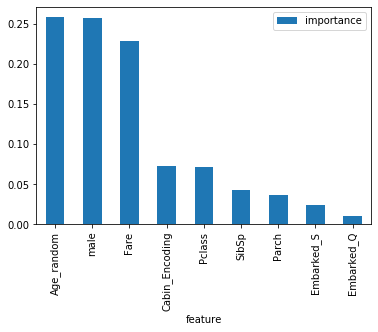

In [58]:
importances.plot.bar()

In [91]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X,y)
predictions=model.predict(XY_test)
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[248  18]
 [ 38 114]]
0.8660287081339713
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       266
           1       0.86      0.75      0.80       152

    accuracy                           0.87       418
   macro avg       0.87      0.84      0.85       418
weighted avg       0.87      0.87      0.86       418



#### Hyperparameter-Tuning RandomizedSearchCV

In [59]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [71]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [72]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'entropy'}

In [73]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [74]:
best_random_grid=rf_randomcv.best_estimator_

In [75]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print("Accuracy Score : {}".format(accuracy_score(Y_test,y_pred)))
print ("Classification Report : \n{}".format(classification_report(Y_test, y_pred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(Y_test,y_pred)))
print("RF Score: {}".format(round(random_forest.score(train_scaling,Y_train)*100,2)))

Accuracy Score : 0.8803827751196173
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       266
           1       0.86      0.80      0.83       152

    accuracy                           0.88       418
   macro avg       0.88      0.86      0.87       418
weighted avg       0.88      0.88      0.88       418

Confusion Matrix: 
[[246  20]
 [ 30 122]]

RF Score: 78.79


In [76]:
yhat= pd.DataFrame(y_pred)
yhat.columns=['Survived']
df_test = pd.read_csv(r'C:\Users\viral.thakar\Downloads\test.csv')
yhat1 = pd.DataFrame(df_test.PassengerId)
yhat1 = pd.concat([yhat1,yhat], axis=1)
yhat1.to_csv('Titanic_Submission6.csv')

#### GridSearch CV

In [77]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'entropy'}

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [float(rf_randomcv.best_params_['min_samples_split'] - 1.5),
                          float(rf_randomcv.best_params_['min_samples_split'] - 1),
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 50, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [450], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [0.5, 1.0, 2, 3, 4], 'n_estimators': [750, 700, 800, 900, 1000]}


In [87]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [88]:
best_grid=grid_search.best_estimator_

In [89]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=450, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification report: {}".format(classification_report(Y_test,y_pred)))

[[245  21]
 [ 29 123]]
Accuracy Score 0.8803827751196173
Classification report:               precision    recall  f1-score   support

           0       0.89      0.92      0.91       266
           1       0.85      0.81      0.83       152

    accuracy                           0.88       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



In [91]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
yhat= pd.DataFrame(y_pred)
yhat.columns=['Survived']
df_test = pd.read_csv(r'C:\Users\viral.thakar\Downloads\test.csv')
yhat1 = pd.DataFrame(df_test.PassengerId)
yhat1 = pd.concat([yhat1,yhat], axis=1)
yhat1.to_csv('Titanic_Submission.csv')

#### Optimize hyperparameters of the model using Optuna

In [149]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest'])
    
    classifier == 'RandomForest'
    n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
    max_depth = int(trial.suggest_float('max_depth', 10, 1000, log=True))
    max_features = trial.suggest_categorical('max_features',['auto', 'sqrt','log2'])
    min_samples_split = trial.suggest_int('min_samples_split',2,14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,8)
    criterion = trial.suggest_categorical('criterion',['entropy','gini'])
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,criterion=criterion)
    
    #else:
        #c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True) 
        #clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(clf,X,y, n_jobs=-1, cv=10).mean()

In [152]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-08-07 20:40:01,007] Trial 0 finished with value: 0.8036786403359437 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1880, 'max_depth': 814.6974235833768, 'max_features': 'log2', 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8036786403359437.
[I 2020-08-07 20:40:08,840] Trial 1 finished with value: 0.8014308818522302 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1500, 'max_depth': 133.882449174513, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8036786403359437.
[I 2020-08-07 20:40:11,369] Trial 2 finished with value: 0.8025672454885937 and parameters: {'classifier': 'RandomForest', 'n_estimators': 430, 'max_depth': 160.94164877013884, 'max_features': 'log2', 'min_samples_split': 13, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8036786403359437.
[I 2020-08-07 20:40:15,598] Trial 3 f

[I 2020-08-07 20:45:04,080] Trial 50 finished with value: 0.8059508001361934 and parameters: {'classifier': 'RandomForest', 'n_estimators': 460, 'max_depth': 53.2565519935668, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 31 with value: 0.810394960844399.
[I 2020-08-07 20:45:06,582] Trial 51 finished with value: 0.8048144364998298 and parameters: {'classifier': 'RandomForest', 'n_estimators': 450, 'max_depth': 988.0857745626959, 'max_features': 'log2', 'min_samples_split': 8, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 31 with value: 0.810394960844399.
[I 2020-08-07 20:45:10,016] Trial 52 finished with value: 0.8048141527635909 and parameters: {'classifier': 'RandomForest', 'n_estimators': 650, 'max_depth': 77.43393981147888, 'max_features': 'log2', 'min_samples_split': 8, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 31 with value: 0.810394960844399.
[I 2020-08-07 20:45:11,951] Trial 53 finished w

Accuracy: 0.810394960844399
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 1720, 'max_depth': 282.6194909333519, 'max_features': 'log2', 'min_samples_split': 9, 'min_samples_leaf': 6, 'criterion': 'gini'}


In [153]:
trial

FrozenTrial(number=31, value=0.810394960844399, datetime_start=datetime.datetime(2020, 8, 7, 20, 42, 33, 546021), datetime_complete=datetime.datetime(2020, 8, 7, 20, 42, 43, 230804), params={'classifier': 'RandomForest', 'n_estimators': 1720, 'max_depth': 282.6194909333519, 'max_features': 'log2', 'min_samples_split': 9, 'min_samples_leaf': 6, 'criterion': 'gini'}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest',)), 'n_estimators': IntUniformDistribution(high=2000, low=200, step=10), 'max_depth': LogUniformDistribution(high=1000, low=10), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2')), 'min_samples_split': IntUniformDistribution(high=14, low=2, step=1), 'min_samples_leaf': IntUniformDistribution(high=8, low=1, step=1), 'criterion': CategoricalDistribution(choices=('entropy', 'gini'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=31, state=TrialState.COMPLETE)

In [154]:
study.best_params

{'classifier': 'RandomForest',
 'n_estimators': 1720,
 'max_depth': 282.6194909333519,
 'max_features': 'log2',
 'min_samples_split': 9,
 'min_samples_leaf': 6,
 'criterion': 'gini'}

In [159]:
rfoptuna = RandomForestClassifier(n_estimators=1720,max_depth=282.6194909333519,max_features='log2',min_samples_split=9,min_samples_leaf=6,criterion='gini')
rfoptuna.fit(X,y)
y_pred = rfoptuna.predict(XY_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification report: {}".format(classification_report(Y_test,y_pred)))

[[256  10]
 [ 20 132]]
Accuracy Score 0.9282296650717703
Classification report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94       266
           1       0.93      0.87      0.90       152

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [160]:
yhat= pd.DataFrame(y_pred)
yhat.columns=['Survived']
df_test = pd.read_csv(r'C:\Users\viral.thakar\Downloads\test.csv')
yhat1 = pd.DataFrame(df_test.PassengerId)
yhat1 = pd.concat([yhat1,yhat], axis=1)
yhat1.to_csv('Titanic_Submission4.csv')

In [113]:
clf = sklearn.svm.SVC(C=0.07482014874435419, gamma='auto')

In [119]:
clf.fit(X,y)

SVC(C=0.07482014874435419, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
clf

SVC(C=0.07482014874435419, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
y_pred = clf.predict(XY_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification report: {}".format(classification_report(Y_test,y_pred)))

[[261   5]
 [  7 145]]
Accuracy Score 0.9712918660287081
Classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       266
           1       0.97      0.95      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [116]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
yhat= pd.DataFrame(y_pred)
yhat.columns=['Survived']
df_test = pd.read_csv(r'C:\Users\viral.thakar\Downloads\test.csv')
yhat1 = pd.DataFrame(df_test.PassengerId)
yhat1 = pd.concat([yhat1,yhat], axis=1)
yhat1.to_csv('Titanic_Submission3.csv')

#### Using Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,y,cv=10)

In [122]:
score

array([0.78888889, 0.81111111, 0.7752809 , 0.84269663, 0.83146067,
       0.78651685, 0.80898876, 0.7752809 , 0.83146067, 0.80681818])

In [156]:
rf=RandomForestClassifier(n_estimators=1720,max_depth=282.6194909333519,max_features='log2',min_samples_split=9,min_samples_leaf=6,criterion='gini')
score=cross_val_score(rf,X,y,cv=10)

In [158]:
score.mean()

0.80816025422767

#### XGBoost

In [161]:
import xgboost as xgb

In [162]:
classifier=xgb.XGBClassifier()
classifier.fit(X,y)
y_pred = classifier.predict(XY_test)

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.9019138755980861
[[249  17]
 [ 24 128]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       266
           1       0.88      0.84      0.86       152

    accuracy                           0.90       418
   macro avg       0.90      0.89      0.89       418
weighted avg       0.90      0.90      0.90       418



In [165]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [166]:
classifier=xgb.XGBClassifier()

In [167]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [169]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [170]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [171]:
classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [172]:
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [175]:
prediction=classifier.predict(XY_test)

In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(prediction,Y_test)
print(cm)
acc_score=accuracy_score(prediction,Y_test)
print(acc_score)

[[245  16]
 [ 21 136]]
0.9114832535885168


In [177]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [178]:
score

array([0.76666667, 0.75555556, 0.76404494, 0.82022472, 0.88764045,
       0.80898876, 0.84269663, 0.75280899, 0.83146067, 0.79545455])

In [179]:
score.mean()

0.8025541936216094